In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, SeparableConv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization, Add, Activation, GlobalAveragePooling1D


In [13]:
# Define input-output file names
datasets = {
    "B": {"input": "./Training_data/input_cathepsin_B.csv", "output": "./Training_data/output_cathepsin_B.csv"},
    "S": {"input": "./Training_data/input_cathepsin_S.csv", "output": "./Training_data/output_cathepsin_S.csv"},
    "D": {"input": "./Training_data/input_cathepsin_D.csv", "output": "./Training_data/output_cathepsin_D.csv"},
    "K": {"input": "./Training_data/input_cathepsin_K.csv", "output": "./Training_data/output_cathepsin_K.csv"},
}

In [14]:
# Function to preprocess data
def preprocess_data(input_path, output_path):
    # Load input and output data
    input_data = pd.read_csv(input_path, header=None)
    output_data = pd.read_csv(output_path, header=None)

    # Normalize input data
    scaler = MinMaxScaler()
    input_data_normalized = scaler.fit_transform(input_data)

    # Handle NaN values
    imputer = SimpleImputer(strategy='mean')
    input_data_imputed = imputer.fit_transform(input_data_normalized)

    # One-hot encode output data
    output_labels = output_data[0].values
    output_data_encoded = pd.get_dummies(output_labels, dtype=np.float32).values

    # Reshape input data for CNN
    input_data_reshaped = input_data_imputed.reshape((input_data_imputed.shape[0], input_data_imputed.shape[1], 1))

    return input_data_reshaped, output_data_encoded

# Function to build the model
def build_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.2))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


Processing dataset B...
Training model for dataset B...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Cathepsin ALL Types\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5713 - loss: 0.9796 - val_accuracy: 0.7606 - val_loss: 0.5739
Epoch 2/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7785 - loss: 0.5434 - val_accuracy: 0.8133 - val_loss: 0.4657
Epoch 3/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8323 - loss: 0.4339 - val_accuracy: 0.8544 - val_loss: 0.3792
Epoch 4/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8579 - loss: 0.3768 - val_accuracy: 0.8522 - val_loss: 0.3729
Epoch 5/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8550 - loss: 0.3581 - val_accuracy: 0.8695 - val_loss: 0.3537
Epoch 6/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8815 - loss: 0.3123 - val_accuracy: 0.8810 - val_loss: 0.3138
Epoch 7/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8927 - loss: 0.2966 - val_accuracy: 0.8846 - val_loss: 0.2982
Epoch 8/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8998 - loss: 0.2716 - val_accuracy: 0.8962

Classification Report for dataset B:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       354
           1       0.96      0.98      0.97       355
           2       0.98      0.98      0.98       337
           3       0.98      1.00      0.99       341

    accuracy                           0.98      1387
   macro avg       0.98      0.98      0.98      1387
weighted avg       0.98      0.98      0.98      1387



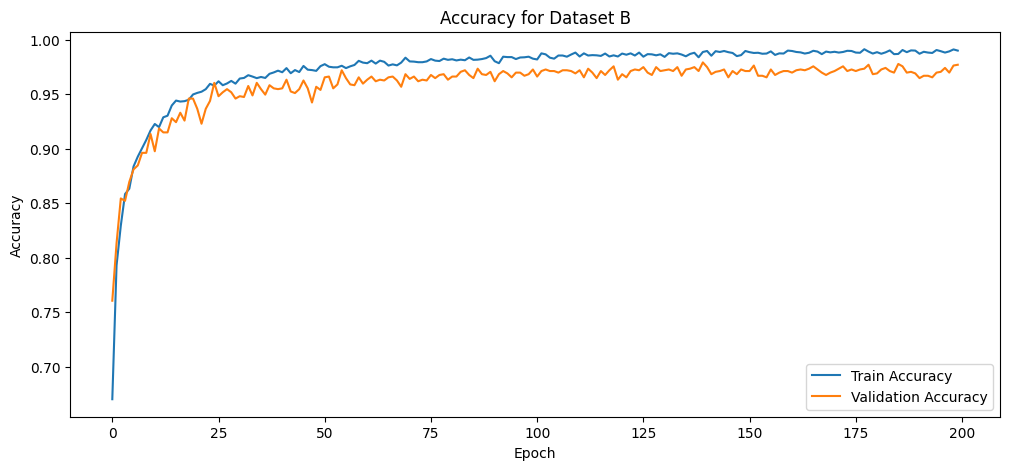

Processing dataset S...
Training model for dataset S...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Cathepsin ALL Types\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4874 - loss: 1.1894 - val_accuracy: 0.6072 - val_loss: 0.8975
Epoch 2/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6448 - loss: 0.8568 - val_accuracy: 0.6811 - val_loss: 0.7788
Epoch 3/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6876 - loss: 0.7673 - val_accuracy: 0.6851 - val_loss: 0.7267
Epoch 4/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7215 - loss: 0.6951 - val_accuracy: 0.7084 - val_loss: 0.6985
Epoch 5/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7433 - loss: 0.6311 - val_accuracy: 0.7189 - val_loss: 0.6830
Epoch 6/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7583 - loss: 0.5868 - val_accuracy: 0.7181 - val_loss: 0.6575
Epoch 7/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7687 - loss: 0.5736 - val_accuracy: 0.7430 - val_loss: 0.6449
Epoch 8/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7688 - loss: 0.5593 - val_accuracy: 0.7510


              precision    recall  f1-score   support

           0       0.87      0.88      0.87       304
           1       0.81      0.84      0.82       304
           2       0.88      0.82      0.85       325
           3       0.96      0.98      0.97       312

    accuracy                           0.88      1245
   macro avg       0.88      0.88      0.88      1245
weighted avg       0.88      0.88      0.88      1245



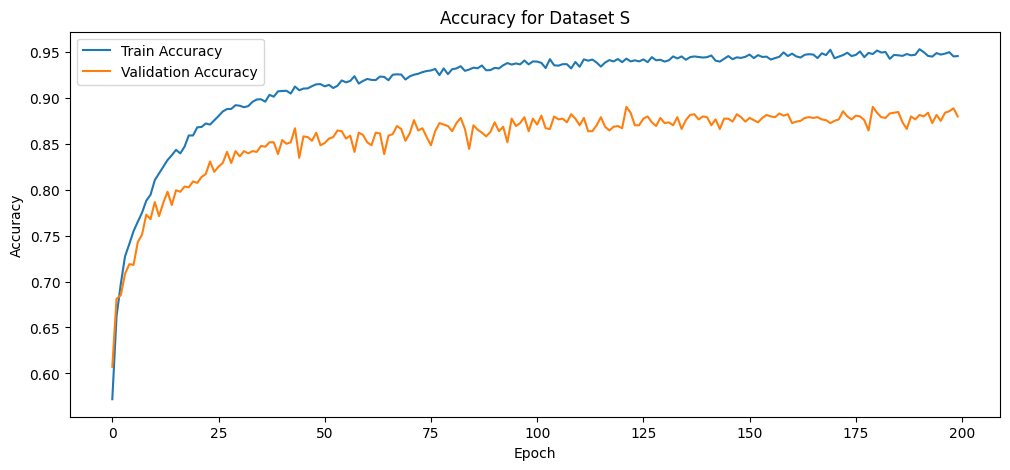

Processing dataset D...
Training model for dataset D...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Cathepsin ALL Types\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6375 - loss: 0.8464 - val_accuracy: 0.7927 - val_loss: 0.4928
Epoch 2/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7979 - loss: 0.4965 - val_accuracy: 0.8378 - val_loss: 0.3944
Epoch 3/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8354 - loss: 0.3940 - val_accuracy: 0.8506 - val_loss: 0.3540
Epoch 4/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8590 - loss: 0.3594 - val_accuracy: 0.8742 - val_loss: 0.3208
Epoch 5/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8779 - loss: 0.3097 - val_accuracy: 0.8978 - val_loss: 0.2810
Epoch 6/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8844 - loss: 0.3030 - val_accuracy: 0.8850 - val_loss: 0.2799
Epoch 7/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8988 - loss: 0.2810 - val_accuracy: 0.9073 - val_loss: 0.2450
Epoch 8/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9038 - loss: 0.2631 - val_accuracy: 0.9144

Classification Report for dataset D:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       621
           1       0.92      0.95      0.94       587
           2       0.96      0.99      0.97       626
           3       0.99      1.00      1.00       583

    accuracy                           0.97      2417
   macro avg       0.97      0.97      0.97      2417
weighted avg       0.97      0.97      0.97      2417



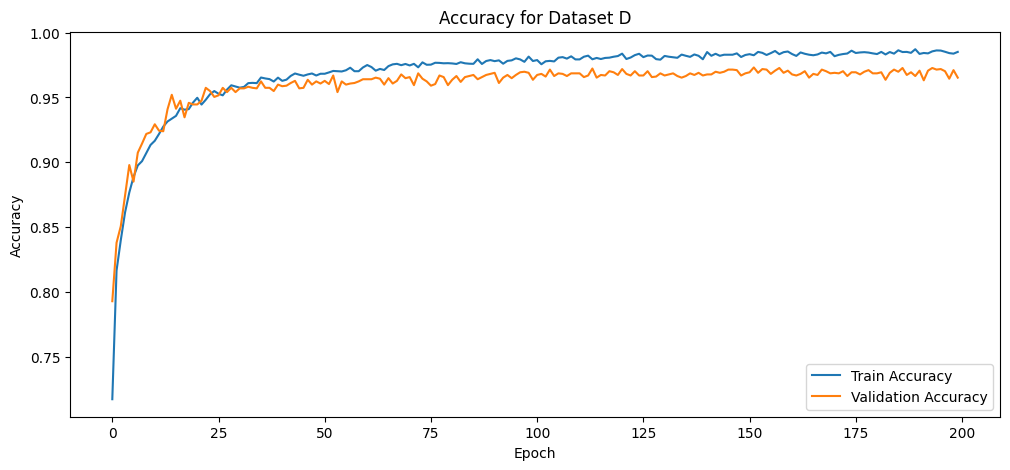

Processing dataset K...
Training model for dataset K...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Cathepsin ALL Types\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3694 - loss: 1.3096 - val_accuracy: 0.5974 - val_loss: 1.0339
Epoch 2/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6104 - loss: 0.9522 - val_accuracy: 0.6533 - val_loss: 0.8664
Epoch 3/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6503 - loss: 0.8307 - val_accuracy: 0.6424 - val_loss: 0.8022
Epoch 4/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6932 - loss: 0.7628 - val_accuracy: 0.6913 - val_loss: 0.7514
Epoch 5/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7015 - loss: 0.7291 - val_accuracy: 0.7213 - val_loss: 0.6985
Epoch 6/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7253 - loss: 0.6769 - val_accuracy: 0.7073 - val_loss: 0.7111
Epoch 7/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7427 - loss: 0.6575 - val_accuracy: 0.7722 - val_loss: 0.6347
Epoch 8/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7663 - loss: 0.5958 - val_accuracy: 0.7782

Classification Report for dataset K:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       246
           1       0.89      0.94      0.91       253
           2       0.94      0.86      0.90       265
           3       0.94      0.99      0.96       237

    accuracy                           0.93      1001
   macro avg       0.93      0.93      0.93      1001
weighted avg       0.93      0.93      0.93      1001



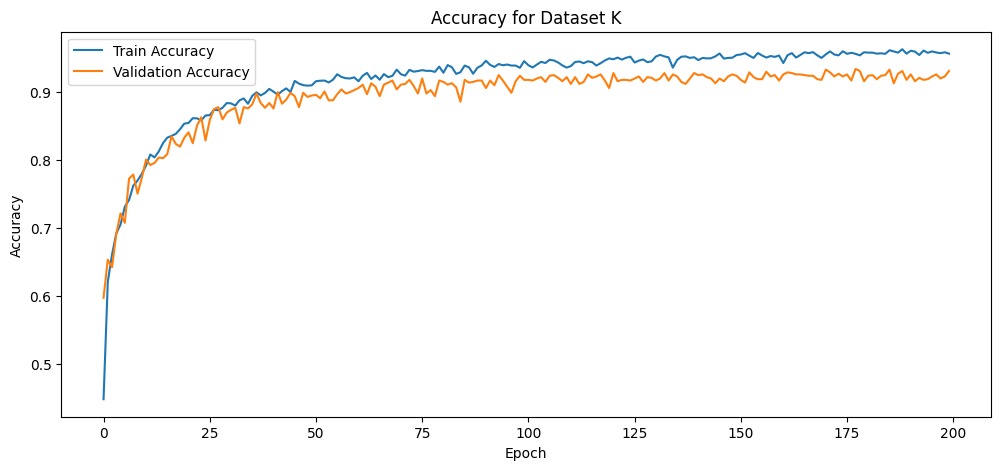

In [15]:
# Process each dataset
for key, paths in datasets.items():
    print(f"Processing dataset {key}...")

    # Preprocess the data
    input_data, output_data = preprocess_data(paths['input'], paths['output'])

    # Apply SMOTE to balance classes
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(
        input_data.reshape(input_data.shape[0], -1), output_data
    )
    X_resampled = X_resampled.reshape((X_resampled.shape[0], input_data.shape[1], 1))

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.2, random_state=42
    )


    # Build the model
    model = build_model(X_train.shape[1:], num_classes=output_data.shape[1])

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    print(f"Training model for dataset {key}...")
    history = model.fit(
        X_train, y_train, 
        epochs=200, 
        batch_size=32, 
        validation_data=(X_test, y_test), 
        # callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate the model
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print(f"Test accuracy for dataset {key}: {test_acc}")

    # Predict and generate classification report
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(f"Classification Report for dataset {key}:")
    print(classification_report(np.argmax(y_test, axis=1), y_pred_classes))
    # Save the trained model
    model.save(f'model_{key}.h5')
    # Plot training history
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Accuracy for Dataset {key}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()